# Pipeline configuration

In [254]:
confi_dict = {

    'general':{
        'root_dir':r"root_folder",
        'dataset_dir': "CASIA-IrisV1",
        # 'dataset_unif_dir': r"CASIA-IrisV1_unif",
        # 'dataset_unif_dir_aug':r"CASIA-IrisV1_unif_aug",
        # 'dataset_unif_segv2_edg_norm_dir' : r"CASIA-IrisV1_unif_segv2_edg_norm",
        ## 'dataset_unif_dir':r"CASIA-IrisV1_unif_aug",
        # 'dataset_unif_segv2_edg_norm_dir' : r"CASIA-IrisV1_unif_aug_segv2_edg_norm",
        'dataset_unif_dir': r"CASIA-IrisV1_reservado"
    },

    '1_tratarDataset':{
        'general_train_size': 0.7,
        'show_first' : False
    },

    '1.1_dataAugmentation':{
        'gaussianNoise' : True,
        'stdGN': [2.5, 5, 7.5],
        'afinTransformation': True
    },

    '2.1_segmentation':{
        'redNeuronal' : "Iris_unet_d5.h5", 
        'numSamplesGenerator' : 3, 
        'verImagenV1' : False
    },

    '3.1_extraction': {
        
    },
    
    # Dataset dir can be "normalizado" or "raw"

    '4_CNN_classification' :{
        'dataset_dir' : "normalizado",
        'CNN_weights' : "imagenet",
        'train_size' : 0.7, 
        'test_size' : 0.3, 
        'random_seed' : 42, 
        'batch_size' : 10, 
        'epochs1' : 50, 
        'plt_accuracy1' : True,
        'epochs2' : 40, 
        'plt_accuracy2' : True,
        'epochs3' : 25, 
        'plt_accuracy3' : True,
        'results_array' : True,
        'save_model' : False, 
        'save_model_name' : "models/normalizado_aug_modelv1"
    }

}

# 1: Tratar el dataset CASIA



## 1 tratar_dataset_casia()

In [255]:
def tratar_dataset_casia(confi):
    
    print("Función 1, tratar_dataset_casia()")
    
    ''' 
    Importando librerías
    '''
    try:
        import os
    except:
        !pip install os
        import os
    try:
        import shutil
    except:
        !pip install shutil
        import shutil
    try:
         import imageio
    except:
        !pip install imageio
        import imageio
    try:
        import random
    except:
        !pip install random
        import random
    try:
        import matplotlib.pyplot as plt
    except:
        !pip install matplotlib
        import matplotlib.pyplot as plt
    ''' 
    Estableciendo la root de la función
    '''
    os.chdir(confi['general']['root_dir'])
    
    def copy_all_samples(path_samples, destination_directory):
        '''
        Copia todas las muestras del dataset de CASIA a un único directorio.
        '''
        if not os.path.exists(path_samples):
            print("->El directorio indicado como input no existe")
        elif not os.path.exists(destination_directory):
            ''' 
            Comprobamos que el directorio del output no existe
            '''
            os.mkdir(destination_directory) # Creamos un nuevo directorio 
            for root, dirs, files in os.walk(path_samples):
                for file in files:
                    path_file = os.path.join(root,file)
                    shutil.copy2(path_file,destination_directory)   
            print("-> Muestras copiadas satisfactoriamente.")
        elif len(os.listdir(destination_directory)) < 1:
            ''' 
            Comprobamos que el directorio del output no está vacío
            '''
            for root, dirs, files in os.walk(path_samples):
                for file in files:
                    path_file = os.path.join(root,file)
                    shutil.copy2(path_file,destination_directory)   
            print("-> Muestras copiadas satisfactoriamente.")
        else:
            print("-> Muestras previamente copiadas.")

    confi['general']['dataset_unif_dir'] = confi['general']['dataset_dir']+"_unif"

    copy_all_samples(confi['general']['dataset_dir'], confi['general']['dataset_unif_dir'])

    
    confi['general']['dataset_reservado_dir'] = confi['general']['dataset_dir']+"_reservado"
    
    if not os.path.exists(confi['general']['dataset_reservado_dir']):
        os.mkdir(confi['general']['dataset_reservado_dir'])
        dataset_names = os.listdir(confi['general']['dataset_unif_dir'])
        dataset_len = len(dataset_names)

        random.shuffle(dataset_names)

        dataset_apartado = dataset_names[int(dataset_len*confi['1_tratarDataset']['general_train_size']):int(dataset_len)]

        for root, dirs, files in os.walk(confi['general']['dataset_unif_dir']):
            for i in files:
                if i in(dataset_apartado):
                    shutil.copy(root + os.sep + i , confi['general']['dataset_reservado_dir'])
                    os.remove(root + os.sep + i)


    if confi['1_tratarDataset']['show_first']:
        ''' 
        Si en la configuración show_first es True, se mostrará el primer elemento del nuevo directorio.
        '''
        path_img = confi['general']['dataset_unif_dir'] + os.sep + os.listdir(confi['general']['dataset_unif_dir'])[0]
        img = imageio.imread(path_img)
        plt.title("Primer elemento de " + confi['general']['dataset_unif_dir'])
        plt.imshow(img)
    
    ''' 
    Pasando el diccionario con la configuración a la siguiente función
    '''
    return confi


## 1.1 data_augmentation()

In [256]:
def data_augmentation(confi):

    print("Función 1.1, data_augmentation()")
    
    ''' 
    Importando librerías
    '''
    try:
        import os
    except:
        !pip install os
        import os
    try:
        import imageio
    except:
        !pip install imageio
        import imageio
    try:
        import skimage.io as io
        from skimage.io import imread
        from skimage.color import rgb2gray
    except:
        !pip install scikit-image
        import skimage.io as io
        from skimage.io import imread
        from skimage.color import rgb2gray
    try:
        import matplotlib.pyplot as plt
    except:
        !pip install matplotlib
        import matplotlib.pyplot as plt
    try:
        from tensorflow.keras.layers import GaussianNoise
    except:
        !pip install tensorflow
        from tensorflow.keras.layers import GaussianNoise
    try:
        import numpy as np
    except:
        !pip install numpy
        import numpy as np
    try:
        import random
    except:
        !pip install random
        import random
    try:
        from scipy import ndimage as ndi
    except:
        !pip install scipy
        from scipy import ndimage as ndi
    try:
        import shutil
    except:
        !pip install shutil
        import shutil

    def affine_transformation(image, trans_type):
        if trans_type == 0:
            mat_reflect = np.array([[1,0,0],[0,-1,0],[0,0,1]]) @ np.array([[1,0,0],[0,1,-h],[0,0,1]])
            image = ndi.affine_transform(image, mat_reflect)
        elif trans_type == 1:
            s_x, s_y = 0.95, 1.05
            mat_scale = np.array([[s_x,0,0],[0,s_y,0],[0,0,1]])
            image = ndi.affine_transform(image, mat_scale)
        elif trans_type == 2:
            mat_identity = np.array([[1,0,0],[0,1,0],[0,0,1]])
            img1 = ndi.affine_transform(image, mat_identity)
            theta = np.pi/10
            mat_rotate = np.array([[1,0,w/2],[0,1,h/2],[0,0,1]]) @ np.array([[np.cos(theta),np.sin(theta),0],[np.sin(theta),-np.cos(theta),0],[0,0,1]]) @ np.array([[1,0,-w/2],[0,1,-h/2],[0,0,1]])
            image = ndi.affine_transform(img1, mat_rotate)
        elif trans_type == 3:
            mat_identity = np.array([[1,0,0],[0,1,0],[0,0,1]])
            img1 = ndi.affine_transform(image, mat_identity)
            lambda1 = 0.1
            mat_shear = np.array([[1,lambda1,0],[lambda1,1,0],[0,0,1]])
            image = ndi.affine_transform(img1, mat_shear)
        else:
            print("Invalid affine transformation type")
        
        return image

    ''' 
    Estableciendo la root de la función
    '''
    os.chdir(confi['general']['root_dir'])
    
    ''' 
    Comprobamos si el ruido gaussiano ha sido establecido como True en la configuración
    '''
    if confi['1.1_dataAugmentation']['gaussianNoise'] or confi['1.1_dataAugmentation']['afinTransformation']:

        shutil.copytree(confi['general']['dataset_unif_dir'], confi['general']['dataset_unif_dir_aug'])

    if confi['1.1_dataAugmentation']['gaussianNoise']:

        ''' 
        Desde el directorio unificado creamos nuevas imágenes utilizando el ruido gaussiano como data augmentation.
        Si el random es 0, no se aplica el aumentador, en cambio si es 1 sí se aplica.
        '''
        for filename in os.listdir(confi['general']['dataset_unif_dir_aug']):
            if ".bmp" in filename:
                if random.randint(0, 1) == 1:
                    path = confi['general']['dataset_unif_dir_aug'] + os.sep + filename
                    image = imageio.imread(path)/255
                    std_rdm = random.choice(confi['1.1_dataAugmentation']['stdGN'])
                    gaussean_function = GaussianNoise(std_rdm/100)
                    noisey = gaussean_function(image.astype(np.float32),training=True)
                    name = path[:-4] + '_noise.bmp'
                    io.imsave(name, noisey)
        print("->Data augmentation 'ruido gausseano' ejecutado correctamente")
    else:
        print("->Saltando el ruido gausseano en data augmentation")

    ''' 
    Comprobamos si las transformaciones afines ha aplicado anteriormente, si es así, el primer elemento del directorio debería de tener el sufijo _augmentation
    '''
    if confi['1.1_dataAugmentation']['afinTransformation']:
        ''' 
        Desde el directorio unificado creamos nuevas imágenes utilizando el ruido gaussiano como data augmentation.
        Si el random es 0, no se aplica el aumentador, en cambio si es 1 sí se aplica.
        '''
        i = 0
        for filename in os.listdir(confi['general']['dataset_unif_dir_aug']):
            if ".bmp" in filename:
                if random.randint(0, 1) == 1:
                    path = confi['general']['dataset_unif_dir_aug'] + os.sep + filename
                    image = rgb2gray(imread(path))
                    w, h = image.shape
                    transformation_type = random.randint(0, 3)
                    image = affine_transformation(image, transformation_type)
                    name = path[:-4] + '_affine.bmp'
                    io.imsave(name, image)
        print("->Data augmentation 'transformación afin' ejecutado correctamente")
    else:
        print("->Saltando las transformaciones afines en data augmentation")

    ''' 
    Pasando el diccionario con la configuración a la siguiente función
    '''
    return confi

# 2 Red U-Net v2

## 2.1 segmentation()

In [257]:
def segmentation(confi):

    print("Función 2.1, segmentation()")

    ''' 
    Importando librerías
    '''
    try:
        import os
    except:
        !pip install os
        import os
    try:
        import cv2
    except:
        !pip install opencv-python
        import cv2
    try:
        import shutil
    except:
        !pip install shutil
        import shutil
    try:
         import imageio
    except:
        !pip install imageio
        import imageio
    try:
        import skimage.transform as trans
        from skimage.io import imshow
        import skimage.io as io
    except:
        !pip install scikit-image
        import skimage.transform as trans
        from skimage.io import imshow
        import skimage.io as io
    try:
        import matplotlib.pyplot as plt
    except:
        !pip install matplotlib
        import matplotlib.pyplot as plt
    try:
        from keras.models import load_model
    except:
        !pip install tensorflow 
        from keras.models import load_model
    try:
        import numpy as np
    except:
        !pip install numpy
        import numpy as np
    try:
        from PIL import Image
    except:
        !pip install Pillow
        from PIL import Image
    ''' 
    Estableciendo la root de la función
    '''
    os.chdir(confi['general']['root_dir'])

    ''' 
    Creamos un generador con un número n de imágenes para pasarselas al modelo en el predict
    *Recordemos que este modelo ya está entrenado para la segmentación del ojo
    '''
    def testGenerator(directory, target_size = (320,320)):
        '''
        Genera las muestras que se le pasarán al método predecir de la red preentrenada.
        
        Parámetros:
        directory -- directorio dónde se encuentran las muestras a generar
        num_image -- número máximo de imágenes que queremos generar
        target_size -- shape de de la muestra
        flag_multi_class -- (de momento mantener pero no nos es útil)
        '''
        for file in os.listdir(directory):
            if ".bmp" in file:
                path_file = os.path.join(directory,file)
                print(path_file)
                img = imageio.imread(path_file)
                img = img / 255
                img = trans.resize(img,target_size)
                img = np.reshape(img, img.shape+(1,))
                img = np.reshape(img, (1,) + img.shape)
                yield img
    
    def get_samples_names(directory):
        '''
        Devuelve los nombres de las muestras (los que se encuentran en los directorios hoja)
        
        Parámetros:
        directory -- directorio de cuyos subdirectorios hoja se quiere el nombre 
        '''
        names = []
        for file in os.listdir(directory):
            if ".bmp" in file:
                names.append(str(file))
                
        return names

    def saveResult(save_path, name_path, npyfile):
        '''
        Guarda los imágenes segmentadas resultado de la red preentrenada
        
        Parámetros:
        save_path -- ruta en la que se guardarán las muestras segmentadas
        name_path -- directorio del que cogeremos los nombres de las muestras
        npyfile -- resultado de la red preentrenada
        '''
        dim = (320, 280) # dimensioned de las muestras del dataset
        os.mkdir(save_path)
        names = get_samples_names(name_path)
        for i, item in enumerate(npyfile):
            img = item[:,:,0]
            img = cv2.resize(img, dim, interpolation=cv2.INTER_AREA)
            io.imsave(os.path.join(save_path,names[i]),img)    

    confi['general']['dataset_unif_seg_dir'] =  confi['general']['dataset_unif_dir']  + "_seg"
    if not os.path.exists(confi['general']['dataset_unif_seg_dir']):
        ''' 
        Cargamos el modelo de segmentación
        '''
        model = load_model(confi['2.1_segmentation']['redNeuronal'])
        print("->Modelo cargado")
        testGene = testGenerator(confi['general']['dataset_unif_dir'])
        Unet_results = model.predict(testGene, verbose=1) 
        saveResult(confi['general']['dataset_unif_seg_dir'], confi['general']['dataset_unif_dir'], Unet_results)
        print("->Segmentaciones guardadas")
    else:
        print("->Segmentaciones previamente guardadas")

    if confi['2.1_segmentation']['verImagenV1']:
        sample = "001_1_1.bmp"
        path_img = confi['general']['dataset_unif_dir'] + os.sep + sample
        path_back = confi['general']['dataset_unif_seg_dir'] + os.sep + sample
        image = Image.open(path_img)
        background = Image.open(path_back)
        background.paste(image, (0, 0), image)
        plt.imshow(background, cmap='gray');
    
    confi['general']['dataset_unif_segv2_dir'] = confi['general']['dataset_unif_seg_dir'] + "v2"
    confi['general']['dataset_unif_segv2_edg_dir'] = confi['general']['dataset_unif_segv2_dir'] + "_edg"

    segv2_dir = False
    edge_dir = False

    for file in os.listdir(confi['general']['dataset_unif_seg_dir']):
        if ".bmp" in file:
            path_file = os.path.join(confi['general']['dataset_unif_seg_dir'],file)
            img = cv2.imread(path_file)
            blur= cv2.GaussianBlur(img,(17,17),0)
            (thresh, binarized) = cv2.threshold(blur, 70, 255, cv2.THRESH_BINARY) # se binariza nuevamente
            edges = cv2.Canny(binarized, 10, 255)

            # creamos un nuevo directorio para guardar las muestras segmentadas con mayor calidad
            if not os.path.exists(confi['general']['dataset_unif_segv2_dir']):
                os.mkdir(confi['general']['dataset_unif_segv2_dir'])
                cv2.imwrite(confi['general']['dataset_unif_segv2_dir'] + os.sep + file, binarized)
                segv2_dir = True
            elif segv2_dir:
                cv2.imwrite(confi['general']['dataset_unif_segv2_dir'] + os.sep + file, binarized)
            else:
                print("->La segmentación v2 ya había sido creada")
                break 

            # creamos un nuevo directorio para guardar las muestras con los bordes detectados
            if not os.path.exists(confi['general']['dataset_unif_segv2_edg_dir']):
                os.mkdir(confi['general']['dataset_unif_segv2_edg_dir'])
                cv2.imwrite(confi['general']['dataset_unif_segv2_edg_dir'] + os.sep + file, edges)# guardamos muestra
                edge_dir = True
            elif edge_dir:
                cv2.imwrite(confi['general']['dataset_unif_segv2_edg_dir'] + os.sep + file, edges)# guardamos muestra
            else:
                print("->La edge ya había sido creada")
                break 
    
    print("->Segmentaciones V2 guardadas")
    print("->Edge guardadas")

    return confi

## 2.2 normalization()

In [258]:
def normalization(confi):

    print("Función 2.2, normalization()")

    ''' 
    Importando librerías
    '''
    try:
        import os
    except:
        !pip install os
        import os
    try:
        import cv2
    except:
        !pip install opencv-python
        import cv2
    try:
        from skimage.transform import (hough_circle, hough_circle_peaks)
        from skimage.io import imshow
    except:
        !pip install scikit-image
        from skimage.transform import (hough_circle, hough_circle_peaks)
        from skimage.io import imshow
    try:
         import imageio
    except:
        !pip install imageio
        import imageio
    try:
        import numpy as np
    except:
        !pip install numpy
        import numpy as np
    try:
        import matplotlib.pyplot as plt
    except:
        !pip install matplotlib
        import matplotlib.pyplot as plt
    try:
        import pandas as pd
    except:
        !pip install pandas
        import pandas as pd
    ''' 
    Estableciendo la root de la función
    '''
    os.chdir(confi['general']['root_dir'])
    ''' 
    Creando funciones
    '''

    def draw_circles(img, cx, cy, radii):
        '''
        A partir de los centros y el radio detectados dibuja el iris sobre la imagen que se le
        pasa como parámetro.
        '''
        image = img.copy()
        return image
    
    def get_circles(borde, sample):
        path_edged = confi['general']['dataset_unif_segv2_edg_dir'] + os.sep + sample
        gray_img = imageio.imread(path_edged)
        
        hough_radii = np.arange(20, 80) # pupila por defecto
        if borde == "iris":
            hough_radii = np.arange(90, 160) # rango del iris
        
        hough_res = hough_circle(gray_img, hough_radii)
        accums, cx, cy, radii = hough_circle_peaks(hough_res, hough_radii, total_num_peaks=1) 

        return [cx[0], cy[0], radii[0]]

    confi['general']['dataset_unif_segv2_edg_norm_dir'] = confi['general']['dataset_unif_segv2_edg_dir'] + "_norm"
    
    if not os.path.exists(confi['general']['dataset_unif_segv2_edg_norm_dir']):
        
        os.mkdir(confi['general']['dataset_unif_segv2_edg_norm_dir'])
    
        image_files = []
        new_dir = confi['general']['dataset_unif_segv2_edg_dir']

        for root, dirs, files in os.walk(new_dir):
            for file in files:
                if file.endswith(".bmp"):
                    image_files.append(file)
                    
        # cogemos las clases a las que pertenece cada .bmp
        classes = []
        images_names= [] 
        
        x_pupil, y_pupil, r_pupil =[], [], []
        x_iris, y_iris, r_iris =[],[],[]

        for file in os.listdir(confi['general']['dataset_unif_segv2_dir']):

            path_sample = confi['general']['dataset_unif_dir'] + os.sep + file
            sample_image = imageio.imread(path_sample)
            boundaries,centers, pupil_centers = [],[],[]
            
            try:
                pupil_coord = get_circles("pupil",file)
                
                # 30 como tamaño minimo para mantener buena calidad
                if pupil_coord[2] > 30:

                    iris_coord = get_circles("iris",file)

                    cx, cy, radius = list(zip(pupil_coord, iris_coord))
                    draw = draw_circles(sample_image,cx,cy,radius)

                    boundaries.append(draw)
                    data = {'pupil':pupil_coord,
                            'iris':iris_coord}

                    centers.append(data)
                    pupil_centers.append(pupil_coord)

                    target = [img for img in boundaries]

                    normalized=[]
                    cent=0
                        
                    for img in target:
                        #load pupil centers and radius of inner circles
                        center_x = pupil_centers[cent][0]
                        center_y = pupil_centers[cent][1]
                        radius_pupil=int(pupil_centers[cent][2])

                        iris_radius = 53 # width of space between inner and outer boundary

                        #define equally spaced interval to iterate over
                        nsamples = 360
                        samples = np.linspace(0,2*np.pi, nsamples)[:-1]
                        polar = np.zeros((iris_radius, nsamples))
                        for r in range(iris_radius):
                            for theta in samples:
                                #get x and y for values on inner boundary
                                x = (r+radius_pupil)*np.cos(theta)+center_x
                                y = (r+radius_pupil)*np.sin(theta)+center_y
                                x=int(x)
                                y=int(y)
                                try:
                                    #convert coordinates
                                    polar[r][int((theta*nsamples)/(2*np.pi))] = img[y][x]
                                except IndexError: #ignores values which lie out of bounds
                                    pass
                                continue
                        res = cv2.resize(polar,(512,64))
                        normalized.append(res)
                        cent+=1

                    h,w = normalized[0].shape # height, width

                    roi = normalized[0][10:h, 0:int(512/2)]
                    roi = roi.astype(np.uint8) 
                    roi_enhanced = cv2.equalizeHist(roi)
                    cv2.imwrite(confi['general']['dataset_unif_segv2_edg_norm_dir'] + os.sep + file, roi_enhanced)

                    classes.append(file.split('_', 1)[0])
                    images_names.append(file)
                    for i in centers:
                        x_pupil.append(i['pupil'][0])
                        y_pupil.append(i['pupil'][1])
                        r_pupil.append(i['pupil'][2])
                        x_iris.append(i['iris'][0])
                        y_iris.append(i['iris'][1])
                        r_iris.append(i['iris'][2])
                else:
                    print(f"No se pudo extraer el iris de: {file}")
            except:
                print(f"No se pudo extraer el iris de: {file}")

        print(classes)
        data = {'image': images_names,
        'pupil x_center':x_pupil,
        'pupil y_center':y_pupil,
        'pupil radius': r_pupil,
        'iris x_center': x_iris,
        'iris y_center': y_iris,
        'iris radius':r_iris,
        'class': classes}
        
        ################################# arrays must be the same lenght
        df = pd.DataFrame(data)[['image','pupil x_center','pupil y_center','pupil radius','iris x_center', 'iris y_center','iris radius',"class"]] 

        df.to_csv("iris_data.csv")
    
    else:
        print("->Normalización realizada con anterioridad")

    return confi

        

# 3 Feature extraction

## 3.1 extraction()

In [259]:
def extraction(confi):
    
    print("Función 3.1, extraction()")

    ''' 
    Importando librerías
    '''
    try:
        import os
    except:
        !pip install os
        import os
    try:
        import cv2
    except:
        !pip install opencv-python
        import cv2
    try:
        from keras.applications.vgg16 import VGG16
        from keras.applications.inception_v3 import InceptionV3
        from keras.applications.resnet_v2 import ResNet50V2
        from keras.applications.vgg16 import preprocess_input as vgg16_preprocessor
        from keras.applications.inception_v3 import preprocess_input as inception_v3_preprocessor
        from keras.applications.resnet_v2 import preprocess_input as resnet_v2_preprocessor
        from keras.models import clone_model
        from keras.models import Model
        from keras.preprocessing import image
    except:
        !pip install keras
        from keras.applications.vgg16 import VGG16
        from keras.applications.inception_v3 import InceptionV3
        from keras.applications.resnet_v2 import ResNet50V2
        from keras.applications.vgg16 import preprocess_input as vgg16_preprocessor
        from keras.applications.inception_v3 import preprocess_input as inception_v3_preprocessor
        from keras.applications.resnet_v2 import preprocess_input as resnet_v2_preprocessor
        from keras.models import clone_model
        from keras.models import Model
        from keras.preprocessing import image
    try:
        from IPython.display import clear_output
    except:
        !pip install ipython
        from IPython.display import clear_output
    try:
        import numpy as np
    except:
        !pip install numpy
        import numpy as np
    try:
        import matplotlib.pyplot as plt
    except:
        !pip install matplotlib
        import matplotlib.pyplot as plt
    try:
        import pandas as pd
    except:
        !pip install pandas
        import pandas as pd

    ''' 
    Estableciendo la root de la función
    '''
    os.chdir(confi['general']['root_dir'])
    ''' 
    Creando funciones
    '''
    models_dict = {}
    vgg16_dict, inception_v3_dict, resnet50_dict = {} ,{} ,{}

    # if there a way to check if they are already load??
    #
    #
    #
    print("Loading VGG16")
    model = VGG16(weights='imagenet')
    model = Model(model.input, model.layers[-2].output) # output_shape de la penúltima capa(fully-connected) -> (,4096)
    vgg16_dict["model"] = clone_model(model)
    vgg16_dict["preprocesor"] = vgg16_preprocessor
    vgg16_dict["target_size"] = model.input_shape[1], model.input_shape[2]# default vgg16 input (224,224)


    print("Loading Inception v3")
    model = InceptionV3(weights='imagenet')
    model = Model(model.input, model.layers[-2].output)# output_shape de la penúltima capa(pooling) -> (,2048)
    inception_v3_dict["model"] = clone_model(model)
    inception_v3_dict["preprocesor"] = inception_v3_preprocessor
    inception_v3_dict["target_size"] = model.input_shape[1],model.input_shape[2] # default inceptionv3 input (299,299)


    print("Loading ResNet 50")
    model = ResNet50V2(weights='imagenet')
    model = Model(model.input, model.layers[-2].output)# output_shape de la penúltima capa(pooling) -> (,2048)
    resnet50_dict["model"] = clone_model(model)
    resnet50_dict["preprocesor"] = resnet_v2_preprocessor
    resnet50_dict["target_size"] = model.input_shape[1],model.input_shape[2]# default ResNet input (224,224)


    # diccionarios de los 3 modelos, clave -> nombre, valor -> otro diccionario
    models_dict["VGG16"] = vgg16_dict
    models_dict["InceptionV3"] = inception_v3_dict
    models_dict["ResNet50"] = resnet50_dict


    confi['3.1_extraction']['models_dict'] = models_dict

    clear_output()

    ''' 
    Extract features: extracción de features pasandole una imágen y el modelo a utilizar
    '''
    def extract_features(image_path, model_name):
        '''
        model_name extaerá los features de la imagen que se le pase como parámetro.
        '''
        model_dict = models_dict[model_name]
        ####
        model = model_dict["model"]
        preprocessor = model_dict["preprocesor"]
        target_size = model_dict["target_size"]
        # se carga la imagen y después se ajusta al input shape del modelo
        img = cv2.resize(cv2.imread(image_path),target_size)

        img_data = image.img_to_array(img)
        img_data = np.expand_dims(img_data, axis=0)
        img_data = preprocessor(img_data)
        
        # extracción de features
        features = model.predict(img_data)
        return features[0]

    # cargamos csv con los datos de las muestras
    df = pd.read_csv("iris_data.csv", dtype={'class': str}, index_col=0) # quitamos columna unnamed

    # cambiamos nombre de columnas para evitar conflictos con palabras reservadas de Pytho
    df.rename(columns={'image':'Image','class':'Clase'}, inplace=True)

    def register_to_deepfeatures(register):
        """
        Compute all CNN features    
        
        Parameters
        ----------
        register : Series
            Serie containing metadata of the image
    
        Returns
        -------
        results : Series 
            A Pandas Serie contanining all of the features

        """
        img_name = register.Image # nombre de la muestra e.g: Rafael_1.bmp
        clase = register.Clase # clase e.g Rafael

        img_dir = os.path.join(confi['general']['dataset_unif_segv2_edg_norm_dir'], img_name)

        basic_values = pd.Series([img_name,clase],["Name","Class"])

        all_features = []
        all_names = []
        models = models_dict.keys() # 3 modelos
        
        for model in models:
            features = extract_features(img_dir, model)
            names = [f"{model}_{i}" for i in range(len(features))]
            all_features+=list(features)
            all_names+= names
            
        results = pd.Series(all_features,all_names)
        return pd.concat((basic_values,results))

    # aplica la función a todas las FILAS del dataframe(parecido a map())
    df_deep = df.apply(register_to_deepfeatures, axis=1)
    df_deep.to_csv("iris_deep_features.csv")

    print("End extraction")

    return confi
    

## 3.2 clasification()

In [260]:
def clasification(confi):
    
    print("Función 3.2, clasification()")

    ''' 
    Importando librerías
    '''

    try:
        import cv2
    except:
        !pip install opencv-python
        import cv2
    try:
        import pickle
    except:
        !pip install pickle-mixin
        import pickle
    try:
        from sklearn.pipeline import make_pipeline
        from sklearn.preprocessing import StandardScaler
        from sklearn.model_selection import cross_val_predict
        from sklearn.svm import  SVC
        from sklearn.neighbors import KNeighborsClassifier
        from sklearn.linear_model import LogisticRegression
        from sklearn.ensemble import RandomForestClassifier
        from sklearn.metrics import classification_report
        from sklearn.metrics import accuracy_score
        from sklearn.metrics import confusion_matrix
        from sklearn.model_selection import train_test_split
    except:
        !pip install -U scikit-learn
        from sklearn.pipeline import make_pipeline
        from sklearn.preprocessing import StandardScaler
        from sklearn.model_selection import cross_val_predict
        from sklearn.svm import  SVC
        from sklearn.neighbors import KNeighborsClassifier
        from sklearn.linear_model import LogisticRegression
        from sklearn.ensemble import RandomForestClassifier
        from sklearn.metrics import classification_report
        from sklearn.metrics import accuracy_score
        from sklearn.metrics import confusion_matrix
        from sklearn.model_selection import train_test_split
    try:
        from keras.preprocessing import image
    except:
        !pip install keras
        from keras.preprocessing import image
    import winsound
    try:
        from tqdm import tqdm
    except:
        !pip install tqdm
        from tqdm import tqdm
    try:
        from joblib import dump, load
    except:
        !pip install joblib
        from joblib import dump, load
    try:
        import heapq
    except:
        !pip install heapq
        import heapq
    try:
        import numpy as np
    except:
        !pip install numpy
        import numpy as np
    try:
        import matplotlib.pyplot as plt
    except:
        !pip install matplotlib
        import matplotlib.pyplot as plt
    try:
        import pandas as pd
    except:
        !pip install pandas
        import pandas as pd

    ''' 
    Elegir el estimador correcto
    '''

    data = pd.read_csv("iris_deep_features.csv", dtype={'Class': str}, index_col=0)

    pretrained_models = ["VGG16","InceptionV3","ResNet50"]
    # true labels
    y = data.Class.values


    vgg_cols = data.columns.str.startswith("VGG16")
    inception_cols = data.columns.str.startswith("InceptionV3")
    resnet_cols = data.columns.str.startswith("ResNet50")


    vgg_X = data[data.columns[vgg_cols]].values
    inception_X = data[data.columns[inception_cols]].values
    resnet_X = data[data.columns[resnet_cols]].values


    datasets = [(vgg_X,y), (inception_X,y), (resnet_X,y)]
    datasets_names = pretrained_models.copy()

    '''
    List of classifiers and their names included in the experimental study
    '''

    cls_names = ["SVM", "Nearest Neighbors", "LogisticRegression", "Random Forest"] #"Gradient Boosting Trees"]

    classifiers = [ make_pipeline(StandardScaler(), SVC(kernel='linear')), #(StandardScaler(), grid_svm)
                    make_pipeline(StandardScaler(), KNeighborsClassifier(3)),
                    make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000)),
                    RandomForestClassifier(random_state=0, n_estimators=100),
    #                 GradientBoostingClassifier(random_state=0, n_estimators=100)
                    ]


    def cross_validate_preds_model(X, y, model, num_folds):
        '''
        @author José F. Díez Pastor
        Perform cross validation with a model and a dataset (X and y),
        and returns the predictions to later obtain the measurements 
        you want
        
        Parameters
        ----------
        X: numpy.array
            Dataset (features)
        Y: numpy.array
            Dataset (Target)
        model: scikit_model
            model to be trained
        num_folds: int
            number of folds in the cross validation
        
        Return
        -------
        array 
            array of prediccions obtained using cross_validation
        '''
        print('\t'+str(model)[:20]+"...", end=' - ')
        preds = cross_val_predict(model,X,y,cv=num_folds)
        print('OK')
        
        return preds

    def run_all_save(num_folds,filename):
        '''
        @author José F. Díez Pastor
        Perform cross validation with all models and datasets.
            
            
        Parameters
        ----------
        num_folds: int
            number of folds in the cross validation
        filename: string
            name of the file that stores the predictions obtained using crossvalidation
            
        Return
        -------
        
        ''' 
        
        all_preds = {}

        for dataset,dataset_name in tqdm(zip(datasets, datasets_names)):
            print(f"----------Pre-trained network: {dataset_name}-----------")
            X,y = dataset
            for model,cls_name in zip(classifiers,cls_names):
                print(f"-> {cls_name}")
                preds = cross_validate_preds_model(X, y, model, num_folds)
                all_preds[(dataset_name,cls_name)]=(y,preds)

        all_preds["cls_names"]=cls_names
        all_preds["dataset_names"]=datasets_names

        with open(filename, 'wb') as fp:
            pickle.dump(all_preds, fp)
    
        ''' 
    Extract features: extracción de features pasandole una imágen y el modelo a utilizar
    '''
    def extract_features(image_path, model_name):
        '''
        model_name extaerá los features de la imagen que se le pase como parámetro.
        '''
        model_dict = confi['3.1_extraction']['models_dict'][model_name]
        ####
        model = model_dict["model"]
        preprocessor = model_dict["preprocesor"]
        target_size = model_dict["target_size"]
        # se carga la imagen y después se ajusta al input shape del modelo
        img = cv2.resize(cv2.imread(image_path),target_size)

        img_data = image.img_to_array(img)
        img_data = np.expand_dims(img_data, axis=0)
        img_data = preprocessor(img_data)
        
        # extracción de features
        features = model.predict(img_data)
        return features[0]

    
    freq = 1500
    dur = 1000

    obj_file = "evaluation_models.obj"

    run_all_save(4,obj_file) # 4 folds (divisor de 756)
    winsound.Beep(freq,dur)

    def get_results(filename):
        '''
        @author: José F. Diez Pastor
        Load the file with the predictions.
        Compute accuracy, confusion matrix and other measures.
            
            
        Parameters
        ----------
        filename: string
            name of the file that stores the predictions obtained using crossvalidation
            
        Return
        dictionary
            A dictionary of key:values that asociates the name
            of a measure or chart with the value
        -------
        
        ''' 

        with open(filename, 'rb') as fp:
            all_preds = pickle.load(fp)

        cls_names = all_preds.pop("cls_names")
        dataset_names = all_preds.pop("dataset_names")

        data_cls_pairs = list(all_preds.keys())
        data_cls_pairs.sort()

        results = {}


        acc_df = pd.DataFrame(index=dataset_names, columns=cls_names)

        ## A DataFrame is created to store the accuracy in each clase
        for dataset in dataset_names:
            results[(dataset,"acc")] = pd.DataFrame(columns=cls_names)


        for dataset_name,cls_name in tqdm(data_cls_pairs):
            #print(dataset_name,cls_name)
            y_true, y_pred = all_preds[(dataset_name,cls_name)]
            labels = list(np.unique(y_true))

            acc = accuracy_score(y_true, y_pred)
            # Fill accuracy dataframe
            acc_df.at[dataset_name,cls_name]=acc
            
            report = classification_report(y_true, y_pred, output_dict=True)
            report_df = pd.DataFrame(report).transpose()
            results[(dataset_name,cls_name,"report")] = report_df

        results["Acc"] = acc_df
        return results


    results = get_results(obj_file)

    precisions = {}
    for i in results.keys():
        if i[-1] == "report":
            print(i,end=" -> ")
            print(results[i]["precision"][-3])
            precisions[results[i]["precision"][-3]] = i
    highest_precision = precisions[max(precisions)]
    highest_precision

    best_model = highest_precision[0]
    best_classifier = highest_precision[1]
    print(f"Best Precision: \n\t - Model: {best_model}\n\t - Classifier: {best_classifier}")

    X, y = datasets[1] #datasets = [(vgg_X,y), (inception_X,y), (resnet_X,y)]

    # Dividimos los datos en entranamiento (80%) y testeo dejando (20%)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    clf = classifiers[2] # LogisticRegression

    clf.fit(X_train,y_train)

    clf.score(X_test, y_test)

    # guardamos el modelo
    dump(clf, "logistic_clf_trained.pkl")

    print(confi['3.1_extraction'])

    ''' 
    Última etapa del reconocimiento: Matching
    '''
    ### Reconocer un sujeto (CASIA_IrisV1_unif_segv2_edg_norm)
    img = confi['general']['dataset_unif_segv2_edg_norm_dir'] + '/001_1_1.bmp' # cambiar ruta a directorio CASIA_IrisV1_unif_segv2_edg_norm
    test_sample = extract_features(img, "InceptionV3")

    # cambiamos el shape para que los transforme a una fila
    test_sample.shape = [1,2048]

    prediction = clf.predict(test_sample)

    prediction_prob = clf.predict_proba(test_sample)

    labels = np.unique(y) # 108 individuos

    #juntamos individuos y la probabilidades
    predicted_dict = dict(zip(prediction_prob[0], labels))

    print(predicted_dict)


    # 5 individuos más probables 
    top_five = heapq.nlargest(5, predicted_dict)
    labels, probs = [], []
    for k,v in predicted_dict.items():
        if k in top_five:
            print(v+" -> "+str(k)+"%")
            labels.append(v)
            probs.append(k)

    y_pos = np.arange(len(labels))
    fig = plt.figure(figsize = (10,5))
    plt.bar(labels, [i*100 for i in probs], color = 'green', width = 0.6)

    plt.xticks(y_pos, labels)
    plt.ylabel('Prediction %')
    plt.title('Iris Prediction...')

    plt.show()

    modelo_cargado = load("logistic_clf_trained.pkl")
    test_sample = extract_features(confi['general']['dataset_unif_segv2_edg_norm_dir'] + '\002_1_1.bmp', "InceptionV3")
    test_sample.shape = [1,test_sample.shape[0]]
    modelo_cargado.predict(test_sample)

# 4 CNN model

## clasificationCNN()

In [261]:
def clasificationCNN(confi):
    print("Función 4, clasificationCNN()")

    ''' 
    Importando librerías
    '''
    try:
        from keras.applications.vgg16 import VGG16
        from tensorflow.keras.applications import EfficientNetB0
        from tensorflow import keras
        from tensorflow.keras import layers
    except:
        !pip install keras
        from keras.applications.vgg16 import VGG16
        from tensorflow.keras.applications import EfficientNetB0
        from tensorflow import keras
        from tensorflow.keras import layers
    try:
        import tensorflow as tf
    except:
        !pip install tensorflow
        import tensorflow as tf
    try:
        import numpy as np
    except:
        !pip install numpy
        import numpy as np
    try:
        import pathlib
    except:
        import pathlib
        !pip install pathlib
    try:
        import matplotlib.pyplot as plt
    except:
        !pip install matplotlib
        import matplotlib.pyplot as plt
    try:
        import os
    except:
        !pip install os
    try:
        import random
    except:
        !pip install random
        import random
    
    ''' 
    Estableciendo la root de la función
    '''
    
    print(confi['general']['root_dir'])
    os.chdir(confi['general']['root_dir'])

    print(confi['4_CNN_classification']['dataset_dir'])

    if confi['4_CNN_classification']['dataset_dir'] == 'normalizado':

        IMAGE_PATHS_DIR = confi['general']['dataset_unif_segv2_edg_norm_dir']
    
    elif confi['4_CNN_classification']['dataset_dir'] == 'raw':
        if confi['general']['dataset_unif_dir_aug']:
            print("Augmentation dataset")
            IMAGE_PATHS_DIR = confi['general']['dataset_unif_dir_aug']
            
        else:
            print("Raw dataset")
            IMAGE_PATHS_DIR = confi['general']['dataset_unif_dir']
            

    paths = np.array([x.__str__() for x in pathlib.Path(IMAGE_PATHS_DIR).rglob('*.bmp')])
    
    random.shuffle(paths)
    
    filenames = tf.constant(paths)
    
    labels_array = np.array([x.split("/")[-1].split("_")[0] for x in paths])
    labels = tf.constant(labels_array)

    n_clases = np.max([int(i) for i in labels_array])
    dataset = tf.data.Dataset.from_tensor_slices((filenames, labels))

    dataset_len = len(dataset)

    train_size = int(confi['4_CNN_classification']['train_size'] * dataset_len)
    test_size = int(confi['4_CNN_classification']['test_size'] * dataset_len)

    print(f"train size: {train_size}")
    print(f"test size: {test_size}")

    def _parse_function(filename, label):
        img = tf.io.read_file(filename)
        image = tf.image.decode_bmp(img, channels = 3)
        label = int(label)
        return image, label

    dataset = dataset.map(_parse_function)

    train_ds = dataset.take(train_size)
    test_ds = dataset.skip(train_size)

    size = (224, 224)

    train_ds = train_ds.map(lambda x, y: (tf.image.resize(x, size), y))
    test_ds = test_ds.map(lambda x, y: (tf.image.resize(x, size), y))

    def label_preprocess(image, label):
        label = tf.one_hot(label-1, n_clases) 
        return image, label

    train_ds = train_ds.map(label_preprocess, num_parallel_calls=tf.data.AUTOTUNE)
    batch_size = confi['4_CNN_classification']['batch_size']
    train_ds = train_ds.batch(batch_size=batch_size, drop_remainder=True)
    train_ds = train_ds.prefetch(tf.data.AUTOTUNE)
    test_ds = test_ds.map(label_preprocess)
    test_ds = test_ds.batch(batch_size=batch_size, drop_remainder=True)

    if batch_size > dataset_len:
        print(f"El modelo fallará puesto que el número de elemento en el dataset {dataset_len} es menor que el tamaño del batch {batch_size}")

    # Create new model on top
    inputs = layers.Input(shape=(224, 224, 3))

    outputs = EfficientNetB0(include_top=True, weights=None, classes=n_clases)(inputs)
    model = keras.Model(inputs, outputs)

    model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

    epochs = confi['4_CNN_classification']['epochs1']  # @param {type: "slider", min:10, max:100}
    hist = model.fit(train_ds, epochs=epochs, validation_data=test_ds, verbose=2)

    def plot_hist(hist):
        plt.plot(hist.history["accuracy"])
        plt.plot(hist.history["val_accuracy"])
        plt.title("model accuracy")
        plt.ylabel("accuracy")
        plt.xlabel("epoch")
        plt.legend(["train", "validation"], loc="upper left")
        plt.show()

    if confi['4_CNN_classification']['plt_accuracy1']:
        plot_hist(hist)

    def build_model(num_classes):
        inputs = layers.Input(shape=(224, 224, 3))
        model = VGG16(include_top=False, input_tensor=inputs, weights=confi['4_CNN_classification']['CNN_weights'])

        # Freeze the pretrained weights
        model.trainable = False
        # Rebuild top
        x = layers.GlobalAveragePooling2D(name="avg_pool")(model.output)
        x = layers.BatchNormalization()(x)

        top_dropout_rate = 0.2
        x = layers.Dropout(top_dropout_rate, name="top_dropout")(x)
        outputs = layers.Dense(num_classes, activation="softmax", name="pred")(x)

        # Compile
        model = keras.Model(inputs, outputs)
        optimizer = keras.optimizers.Adam(learning_rate=1e-2)
        model.compile(
            optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"]
        )
        return model

    model = build_model(num_classes=n_clases)
    epochs = confi['4_CNN_classification']['epochs2']  # @param {type: "slider", min:8, max:80}
    hist = model.fit(train_ds, epochs=epochs, validation_data=test_ds, verbose=2)

    if confi['4_CNN_classification']['plt_accuracy2']:
        plot_hist(hist)

    def unfreeze_model(model):
        # We unfreeze the top 20 layers while leaving BatchNorm layers frozen
        for layer in model.layers[-20:]:
            if not isinstance(layer, layers.BatchNormalization):
                layer.trainable = True

        optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
        model.compile(
            optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"]
        )

    unfreeze_model(model)

    epochs = confi['4_CNN_classification']['epochs3']  # @param {type: "slider", min:8, max:50}
    hist = model.fit(train_ds, epochs=epochs, validation_data=test_ds, verbose=2)

    if confi['4_CNN_classification']['plt_accuracy3']:
        plot_hist(hist)

    size = (224, 224)

    def _parse_image(filename):
        img = tf.io.read_file(filename)
        img = tf.image.decode_bmp(img, channels = 3)
        img = tf.image.resize(img, size)
        img = tf.expand_dims(img, 0)
        return img

    try_dataset_path = os.listdir(IMAGE_PATHS_DIR)
    try_dataset_len = len(try_dataset_path)
    try_image_name = try_dataset_path[random.randint(0, try_dataset_len)]
    try_image_path = IMAGE_PATHS_DIR + os.sep + try_image_name
    try_image_class = int(try_image_path.split("/")[-1].split("_")[0])
    try_image = _parse_image(try_image_path)
    result = model.predict(try_image)

    print(f"Actiual class is {try_image_class} and the predicted class is: {np.argmax(result) + 1}")

    if confi['4_CNN_classification']['results_array']:
        print(result)
        label_int = np.unique([int(i) for i in labels_array])
        probs = result[0]
        y_pos = np.arange(n_clases)
        fig = plt.figure(figsize = (10,5))   
        plt.bar([x - 1 for x in label_int], [i*100 for i in probs], width = 0.2)
        plt.xticks(y_pos, label_int)
        plt.ylabel('Prediction %')
        plt.title('Iris Prediction...')
        plt.show()

    if confi['4_CNN_classification']['save_model']:
        model.save(confi['4_CNN_classification']['save_model_name'])
        print("Model saved")


# Definir y ejecutar el pipeline

## Definición del pipeline

In [262]:
try:
    from sklearn.preprocessing import FunctionTransformer
    from sklearn.pipeline import Pipeline
except:
    !pip install scikit-learn
    from sklearn.preprocessing import FunctionTransformer
    from sklearn.pipeline import Pipeline

In [263]:
_1_tratar_dataset_pip = FunctionTransformer(tratar_dataset_casia)
_1_1_data_augmentation_pip = FunctionTransformer(data_augmentation)
_2_1_segmentation_pip = FunctionTransformer(segmentation)
_2_2_normalization_pip = FunctionTransformer(normalization)
#_3_1_extraction_pip = FunctionTransformer(extraction)
#_3_2_clasification_pip = FunctionTransformer(clasification)
_4_clasificationCNN_pip = FunctionTransformer(clasificationCNN)

# iris_recognition_pipeline = Pipeline([('_1_tratarDataset', _1_tratar_dataset_pip), 
#                                     ('_1_1_dataAugmentation', _1_1_data_augmentation_pip), 
#                                     ('_2_1_segmentation', _2_1_segmentation_pip), 
#                                     ('_2_2_normalization', _2_2_normalization_pip),
#                                     ('_3_1_extraction', _3_1_extraction_pip),
#                                     ('_3_2_clasification', _3_2_clasification_pip), 
#                                     ('_4_clasificationCNN', _4_clasificationCNN_pip)
#                                                                                   ])

# iris_recognition_pipeline = Pipeline([('_1_tratarDataset', _1_tratar_dataset_pip),  
#                                     ('_2_1_segmentation', _2_1_segmentation_pip), 
#                                     ('_2_2_normalization', _2_2_normalization_pip), 
#                                     ('_4_clasificationCNN', _4_clasificationCNN_pip)])

# iris_recognition_pipeline = Pipeline([('_1_tratarDataset', _1_tratar_dataset_pip), 
#                                     ('_4_clasificationCNN', _4_clasificationCNN_pip)])

# iris_recognition_pipeline = Pipeline([('_1_tratarDataset', _1_tratar_dataset_pip)])

# iris_recognition_pipeline = Pipeline([('_4_clasificationCNN', _4_clasificationCNN_pip)])

# iris_recognition_pipeline = Pipeline([('_1_tratarDataset', _1_tratar_dataset_pip), 
#                                     ('_1_1_dataAugmentation', _1_1_data_augmentation_pip)])

iris_recognition_pipeline = Pipeline([  
                                    ('_2_1_segmentation', _2_1_segmentation_pip), 
                                    ('_2_2_normalization', _2_2_normalization_pip), 
                                    ])


## Ejecición pipeline


Función 4, clasificationCNN()
/home/ipl1002/root_folder
normalizado
train size: 756
test size: 324
Epoch 1/50
75/75 - 50s - loss: 5.2059 - accuracy: 0.0227 - val_loss: 4.8171 - val_accuracy: 0.0031 - 50s/epoch - 666ms/step
Epoch 2/50
75/75 - 37s - loss: 4.4473 - accuracy: 0.0533 - val_loss: 5.4625 - val_accuracy: 0.0031 - 37s/epoch - 489ms/step
Epoch 3/50
75/75 - 37s - loss: 3.6485 - accuracy: 0.1213 - val_loss: 8.0754 - val_accuracy: 0.0312 - 37s/epoch - 489ms/step
Epoch 4/50
75/75 - 37s - loss: 2.8822 - accuracy: 0.2507 - val_loss: 8.6393 - val_accuracy: 0.0031 - 37s/epoch - 487ms/step
Epoch 5/50
75/75 - 36s - loss: 2.0355 - accuracy: 0.4480 - val_loss: 10.0892 - val_accuracy: 0.0375 - 36s/epoch - 486ms/step
Epoch 6/50
75/75 - 37s - loss: 1.4504 - accuracy: 0.6160 - val_loss: 5.8732 - val_accuracy: 0.1312 - 37s/epoch - 488ms/step
Epoch 7/50
75/75 - 43s - loss: 0.8697 - accuracy: 0.7627 - val_loss: 2.6715 - val_accuracy: 0.4406 - 43s/epoch - 571ms/step
Epoch 8/50
75/75 - 80s - loss: 0

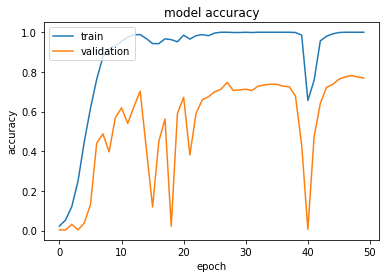

Epoch 1/40
75/75 - 67s - loss: 4.0180 - accuracy: 0.2307 - val_loss: 3.0715 - val_accuracy: 0.3688 - 67s/epoch - 895ms/step
Epoch 2/40
75/75 - 66s - loss: 0.4898 - accuracy: 0.8800 - val_loss: 2.2553 - val_accuracy: 0.4875 - 66s/epoch - 881ms/step
Epoch 3/40
75/75 - 66s - loss: 0.1336 - accuracy: 0.9693 - val_loss: 1.8760 - val_accuracy: 0.5719 - 66s/epoch - 879ms/step
Epoch 4/40
75/75 - 66s - loss: 0.0732 - accuracy: 0.9880 - val_loss: 1.9715 - val_accuracy: 0.6000 - 66s/epoch - 878ms/step
Epoch 5/40
75/75 - 66s - loss: 0.0373 - accuracy: 0.9933 - val_loss: 1.7258 - val_accuracy: 0.6125 - 66s/epoch - 879ms/step
Epoch 6/40
75/75 - 66s - loss: 0.0147 - accuracy: 0.9987 - val_loss: 1.7878 - val_accuracy: 0.6406 - 66s/epoch - 878ms/step
Epoch 7/40
75/75 - 66s - loss: 0.0432 - accuracy: 0.9893 - val_loss: 1.8736 - val_accuracy: 0.5969 - 66s/epoch - 881ms/step
Epoch 8/40
75/75 - 66s - loss: 0.0211 - accuracy: 0.9960 - val_loss: 2.0025 - val_accuracy: 0.6031 - 66s/epoch - 880ms/step
Epoch 9/

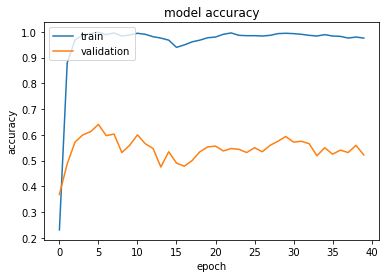

Epoch 1/25
75/75 - 177s - loss: 9.4463 - accuracy: 0.0427 - val_loss: 246.1679 - val_accuracy: 0.0063 - 177s/epoch - 2s/step
Epoch 2/25
75/75 - 176s - loss: 8.4166 - accuracy: 0.0160 - val_loss: 64.3724 - val_accuracy: 0.0156 - 176s/epoch - 2s/step
Epoch 3/25
75/75 - 175s - loss: 7.0624 - accuracy: 0.0253 - val_loss: 33.9553 - val_accuracy: 0.0031 - 175s/epoch - 2s/step
Epoch 4/25
75/75 - 175s - loss: 6.3739 - accuracy: 0.0573 - val_loss: 28.4905 - val_accuracy: 0.0000e+00 - 175s/epoch - 2s/step
Epoch 5/25
75/75 - 203s - loss: 6.1651 - accuracy: 0.0427 - val_loss: 30.8537 - val_accuracy: 0.0125 - 203s/epoch - 3s/step
Epoch 6/25
75/75 - 175s - loss: 5.6871 - accuracy: 0.0707 - val_loss: 21.3267 - val_accuracy: 0.0031 - 175s/epoch - 2s/step
Epoch 7/25
75/75 - 174s - loss: 5.0897 - accuracy: 0.0947 - val_loss: 16.0805 - val_accuracy: 0.0219 - 174s/epoch - 2s/step
Epoch 8/25
75/75 - 176s - loss: 4.5385 - accuracy: 0.1413 - val_loss: 15.6670 - val_accuracy: 0.0344 - 176s/epoch - 2s/step
Epo

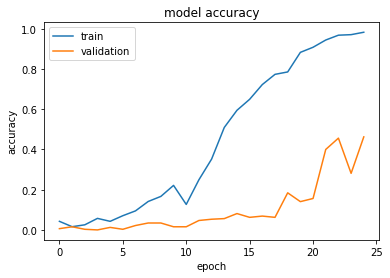

Actiual class is 71 and the predicted class is: 71
[[1.3039011e-05 2.1647908e-08 6.2428729e-11 8.8686232e-09 7.9647883e-10
  1.4647702e-05 1.3885561e-06 2.3992268e-09 1.5812855e-09 3.1349283e-09
  4.4544590e-09 1.0022428e-06 2.8401725e-09 4.3395168e-10 3.1448819e-09
  7.4122018e-13 1.0882176e-05 2.9749128e-10 2.3886556e-04 3.1930380e-08
  8.0018549e-07 1.0968901e-06 5.6514500e-09 4.7938840e-08 2.3342922e-10
  4.1703847e-06 2.1741858e-10 1.4276519e-09 2.5826450e-09 9.2277408e-11
  1.1496963e-08 2.6516554e-07 6.7477157e-09 1.3098482e-11 1.6349273e-06
  1.1951280e-08 1.1520369e-07 7.1622586e-10 1.6082913e-04 3.6114889e-09
  9.7318126e-12 6.2275229e-10 5.5696486e-10 1.1823055e-06 1.2293738e-08
  1.1210647e-08 3.1117801e-04 1.0942413e-08 4.9456124e-09 2.8021540e-11
  1.7994212e-07 4.2891748e-09 1.4322894e-06 3.8468970e-09 5.7057164e-08
  1.4586622e-08 3.1510845e-09 1.3591501e-09 1.8710990e-08 5.5785527e-08
  1.9902964e-07 6.6758608e-09 3.1317867e-08 9.0112398e-09 4.0699351e-07
  4.1591619e-

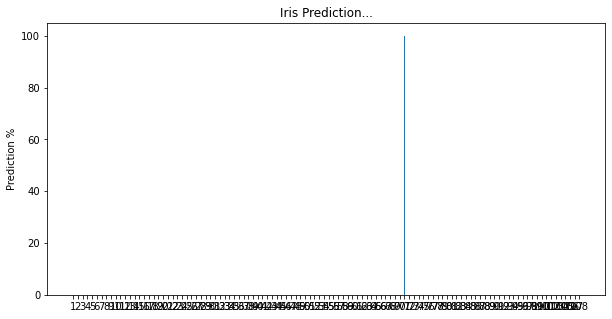

INFO:tensorflow:Assets written to: models/normalizado_aug_modelv1/assets
Model saved


In [264]:
iris_recognition_pipeline.transform(confi_dict)